In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import os
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [2]:
# US Income data set path
income_path = "Resources/income.csv"

# Import the data into a Pandas DataFrame
df = pd.read_csv(income_path)
df.head(10)

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [3]:
columns = ['Age',
           'Employer_Type',
           'fnlgwt',
           'Education',
           'Ed_Numeric',
           'Marital_Status',
           'Occupation',
           'Relationship',
           'Race',
           'Sex',
           'Capital_Gain',
           'Capital_Loss',
           'Hours_per_Week',
           'Country',
           'Income_Above_Below_50K']
df=pd.read_csv(income_path, names=columns)
df.head(10)

,Age,Employer_Type,fnlgwt,Education,Ed_Numeric,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_Week,Country,Income_Above_Below_50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
Age                       32561 non-null int64
Employer_Type             32561 non-null object
fnlgwt                    32561 non-null int64
Education                 32561 non-null object
Ed_Numeric                32561 non-null int64
Marital_Status            32561 non-null object
Occupation                32561 non-null object
Relationship              32561 non-null object
Race                      32561 non-null object
Sex                       32561 non-null object
Capital_Gain              32561 non-null int64
Capital_Loss              32561 non-null int64
Hours_per_Week            32561 non-null int64
Country                   32561 non-null object
Income_Above_Below_50K    32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
# Check for null values
print ("\nNull Values :  ", df.isnull().sum().values.sum())


Null Values :   0


In [6]:
# Check for " ?" values
df_missing = (df==' ?').sum()
df_missing

Age                          0
Employer_Type             1836
fnlgwt                       0
Education                    0
Ed_Numeric                   0
Marital_Status               0
Occupation                1843
Relationship                 0
Race                         0
Sex                          0
Capital_Gain                 0
Capital_Loss                 0
Hours_per_Week               0
Country                    583
Income_Above_Below_50K       0
dtype: int64

In [7]:
# Remove rows which have invalid data from data frame
df = df[(df.astype(str) != ' ?').all(axis=1)]

# Make sure that the rows were dropped. There were 32561 rows before.
len(df)

30162

In [8]:
# Create a new column for income which is binary
df['Income_Above/Below_50K'] = df.apply(lambda row: 
                                        1 if '>50K' in row['Income_Above_Below_50K'] 
                                        else 0, axis=1)

In [9]:
# Remove unwanted columns
df = df.drop(['Income_Above_Below_50K',
              'fnlgwt',
              'Ed_Numeric',
              'Capital_Gain',
              'Capital_Loss',
              'Country'], axis=1)
df.head(10)

,Age,Employer_Type,Education,Marital_Status,Occupation,Relationship,Race,Sex,Hours_per_Week,Income_Above/Below_50K
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,0
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,0
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,0
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,0
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,0
5,37,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,0
6,49,Private,9th,Married-spouse-absent,Other-service,Not-in-family,Black,Female,16,0
7,52,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,1
8,31,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,50,1
9,42,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,1


In [10]:
# Re-cast categorical columns using one-hot encoding
df = pd.get_dummies(df, columns=['Employer_Type',
                                 'Education',
                                 'Marital_Status',
                                 'Occupation',
                                 'Relationship',
                                 'Race',
                                 'Sex'])
df.head()

,Age,Hours_per_Week,Income_Above/Below_50K,Employer_Type_ Federal-gov,Employer_Type_ Local-gov,Employer_Type_ Private,Employer_Type_ Self-emp-inc,Employer_Type_ Self-emp-not-inc,Employer_Type_ State-gov,Employer_Type_ Without-pay,...,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Race_ Amer-Indian-Eskimo,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White,Sex_ Female,Sex_ Male
0,39,40,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
1,50,13,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
2,38,40,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,53,40,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,28,40,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0


In [11]:
y = df['Income_Above/Below_50K']
X = df.drop(['Income_Above/Below_50K'], axis = 1)
X = pd.get_dummies(X)
print("Total features: {}".format(X.shape[1]))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

Total features: 59


# KNN Model

In [12]:
from sklearn.neighbors import KNeighborsClassifier

k: 1, Train/Test Score: 0.964/0.764
k: 3, Train/Test Score: 0.882/0.788
k: 5, Train/Test Score: 0.860/0.798
k: 7, Train/Test Score: 0.850/0.800
k: 9, Train/Test Score: 0.843/0.801
k: 11, Train/Test Score: 0.839/0.805
k: 13, Train/Test Score: 0.834/0.806
k: 15, Train/Test Score: 0.833/0.807
k: 17, Train/Test Score: 0.832/0.803
k: 19, Train/Test Score: 0.829/0.807


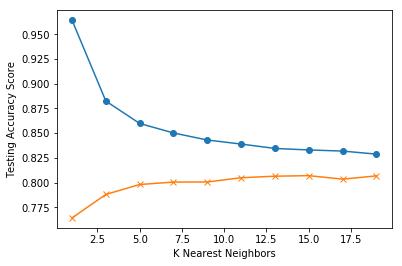

In [13]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("K Nearest Neighbors")
plt.ylabel("Testing Accuracy Score")
plt.show()

In [14]:
# Note that k: 5 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print('k=5 Test Acc: %.3f' % knn.score(X_test, y_test))

k=5 Test Acc: 0.798
